In [142]:
import math

h   = 1/2
t_0 = 0

x   = lambda t: 1
dx  = lambda t: t + x(t)
d2x = lambda t: 1 + dx(t)
d3x = lambda t: d2x(t)
d4x = lambda t: d3x(t)

first  = x(t_0) + h * dx(t_0)

second = x(t_0) + h * (dx(t_0) +
                      ((1/2) * h * d2x(t_0)))

third  = x(t_0) + h * (dx(t_0) +
                      ((1/2) * h * (d2x(t_0) +
                      ((1/3) * h * (d3x(t_0))))))

fourth = x(t_0) + h * (dx(t_0) +
                      ((1/2) * h * (d2x(t_0) +
                      ((1/3) * h * (d3x(t_0) +
                      ((1/4) * h * (d4x(t_0))))))))

fourth



1.796875

In [ ]:
def taylor_diff(t0, h, functions):
    approx = 0
    for i in range(1, len(functions)-1):
        approx += 1/(math.factorial(i)) + h**i * functions[i](t0) 
    
    return approx

taylor_diff(0, (1/2), [x, dx, d2x, d3x, d4x])

#### Doesn't work

In [8]:
import numpy as np
def order_2_taylor(a, b, n, x_0, df, ddf):
    """
    Parameters
    ----------
    a, b
        interval edges
    
    n 
        itterations
    
    x_0
        initial value of x (x(a) = x_0)
    
    df, ddf
        derivatives of function
    """
    h = (b-a)/n
    t = a
    x = x_0
    vals = [x_0]
    for k in range(1,n+1):
        df_val = df(t, x)
        ddf_val = ddf(df_val, x)
        
        x = x + h * (df_val + (1/2) * h * ddf_val)
        
        vals.append(x)
        t = (a+k*h)
        
    return vals

n = 10
x_0 = 1
dx = lambda t, x: t + x
d2x = lambda dx, x: 1 + dx

app_vals = order_2_taylor(0,0.5,n,x_0,dx,d2x)

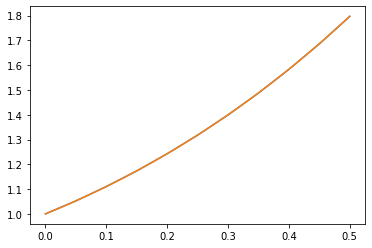

In [12]:
import matplotlib.pyplot as plt
xs = np.linspace(0, 0.5, n+1, endpoint=True)
plt.plot(xs, app_vals)

xs = np.linspace(0, 0.5, 1000, endpoint=True)
acc_vals = lambda t: -t - 1 + 2*math.exp(t)
plt.plot(xs, [acc_vals(x) for x in xs])

plt.show()

In [168]:
import pandas as pd
errors = list()
rel_errors = ["-"]
acc = -1-(1/2)+2*math.exp(1/2)
ns = [16, 32, 64, 128, 256, 512, 1024]
for n in ns:
    error = abs(acc - order_2_taylor(0,0.5,n,x_0,dx,d2x)[-1])
    errors.append(error)
    if n != ns[0]:
        rel_errors.append(errors[-2]/error)
    
pd.DataFrame({"n": ns, "error": errors, "relative errors": rel_errors})

,n,error,relative errors
0,16,2.621254e-04,-
1,32,6.630472e-05,3.95334
2,64,1.667365e-05,3.97662
3,128,4.180648e-06,3.98829
4,256,1.046694e-06,3.99414
5,512,2.618653e-07,3.99707
6,1024,6.549031e-08,3.99854


In [153]:
order_2_taylor(0,0.5,10000,x_0,dx,d2x)[-1]

inf

In [34]:
def RK4(f, t, x, h, n):
    """
    Parameters
    ----------
    f
        function to approksimate
        
    t
        start of interval
    
    x
        initial value of x (x(t) = x)
    
    h
        (end interval - start interval) / 2 or (b-a)/2
    
    n
        itterations
    
    Returns
    ---------
    x
        Aprroksimated value at the end of the interval (for differential equations)
    """
    ta = t
    h2 = h / 2
    for j in range(1, n):
        k1 = h * f(t, x)
        k2 = h * f(t + h2, x + 0.5 * k1)
        k3 = h * f(t + h2, x + 0.5 * k2)
        k4 = h * f(t + h, x + k3)
        
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = ta + j * h
    return x

f = lambda t, x: t + x
t = 0
x = 1
n = 10000
h = (1 - t)/n


RK4(f, t, x, h, n)

3.4361200277343054

In [67]:
df = lambda t, x: x**(1/3)
ddf = lambda t, x: 1
order_2_taylor(0, 1, 1000, 0, df, ddf)[-1]

0.5426926209691338

In [70]:
from sympy import *
x = symbols("x")
df = Lambda(x, x**(1/3))
integrate(df(x),t)

t*x**0.333333333333333

In [69]:
((2/3) * 1) ** (3/2)

0.5443310539518174

In [72]:
f = lambda t, x: t*x**(1/3)
t = 0
x = 0
n = 1000
h = (1 - t)/n
RK4(f, t, x, h, n)

0.0

In [77]:

import numpy as np
def RK4system(fs, t, xs, h, n):
    """
    Parameters
    ----------
    f
        system to approximate
        
    t
        start of interval
    
    x
        initial value of x (x(t) = x)
    
    h
        (end interval - start interval) / 2 or (b-a)/2
    
    n
        itterations
    
    Returns
    ---------
    x
        Aprroximated value at the end of the interval (for differential equations)
    """
    xs = np.array(xs)
    ta = t
    h2 = h / 2
    for j in range(1, n):
        k1 = h * np.array([f(t, xs[i]) for i, f in enumerate(fs)])
        k2 = h * np.array([f(t + h2, xs[i] + 0.5 * k1) for i, f in enumerate(fs)])
        k3 = h * np.array([f(t + h2, xs[i] + 0.5 * k2) for i, f in enumerate(fs)])
        k4 = h * np.array([f(t + h, xs[i] + k3) for i, f in enumerate(fs)])
        
        xs += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = ta + j * h
    return x

fs = [lambda z1: z3]

[<function __main__.<lambda>(t, x, y)>, <function __main__.<lambda>(t, x, y)>]